# Linear Regression


In [137]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def set_default(figsize=(8, 5), dpi=100):
    plt.style.use(["dark_background", "bmh"])
    plt.rc("axes", facecolor="k")
    plt.rc("figure", facecolor="k")
    plt.rc("figure", figsize=figsize, dpi=dpi)


set_default()

In [139]:
# Dataset

x_train = np.linspace(-2, 2, 200)

noise = np.random.normal(
    0,
    0.2,
    x_train.shape,
)  # 100 random numbers with normal distribution

y_train = np.square(x_train) + noise

x_train = x_train.astype(np.float32)
noise = noise.astype(np.float32)
y_train = y_train.astype(np.float32)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [140]:
# Hyper-parameters
input_size = 1
output_size = 1
hidden_size_1 = 10
hidden_size_2 = 10
num_epochs = 1000
learning_rate = 0.01

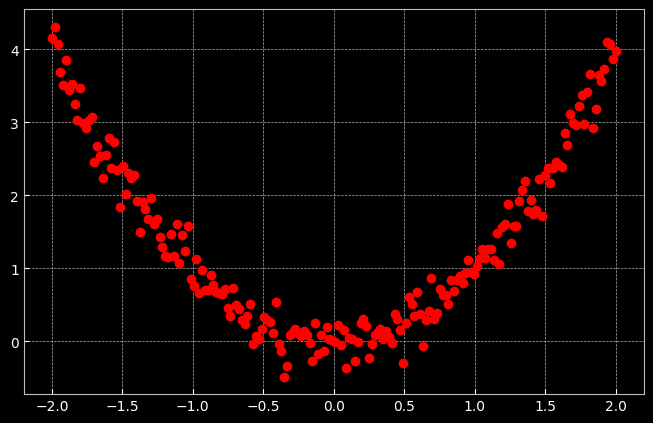

In [141]:
# plot the training data
plt.plot(x_train, y_train, "ro", label="Original data")

In [142]:
# Linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim_1, hidden_dim_2):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1, bias=True)
        self.ReLU1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2, bias=True)
        self.ReLU2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim_2, output_dim, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU1(x)
        x = self.fc2(x)
        x = self.ReLU2(x)
        x = self.fc3(x)
        return x

In [143]:
model = LinearRegression(input_size, output_size, hidden_size_1, hidden_size_2)

# check the parameters of the linear model
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[-0.2718],
        [-0.3828],
        [-0.5202],
        [-0.5036],
        [ 0.1140],
        [ 0.7282],
        [ 0.8102],
        [ 0.5247],
        [ 0.3890],
        [-0.4875]], requires_grad=True)
fc1.bias Parameter containing:
tensor([ 0.3346, -0.6920,  0.7014, -0.4242, -0.2125,  0.9124,  0.0985, -0.2550,
         0.5555, -0.5784], requires_grad=True)
fc2.weight Parameter containing:
tensor([[-0.2526,  0.1399,  0.1154, -0.2545, -0.2397,  0.1826, -0.1701,  0.2036,
          0.1882,  0.2451],
        [ 0.2251, -0.0610,  0.2899,  0.1765, -0.2035,  0.1910, -0.1350,  0.1172,
          0.1181, -0.0340],
        [-0.1014,  0.3002,  0.1602,  0.1062,  0.0539, -0.0504, -0.1163, -0.1044,
          0.1810, -0.1931],
        [ 0.3098,  0.0493,  0.2990, -0.3052,  0.0190, -0.2603,  0.0860, -0.0839,
          0.0286, -0.2096],
        [-0.2757, -0.2298,  0.2966,  0.2539, -0.0417, -0.0361,  0.2757,  0.1064,
          0.0163,  0.1041],
        [-0.1264,  0

In [144]:
# Loss Function
criterion = nn.MSELoss()

# Optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(
    model.parameters(), lr=learning_rate, weight_decay=0.01
)  # weight_decay is L2 regularization

In [145]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model.forward(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()  # clear the gradients, otherwise they will accumulate
    loss.backward()  # compute the gradients
    optimizer.step()  # update the weights

    # print the loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Save the model checkpoint
# torch.save(model.state_dict(), "model.ckpt")

Epoch [5/1000], Loss: 3.7253
Epoch [10/1000], Loss: 2.7360
Epoch [15/1000], Loss: 2.1720
Epoch [20/1000], Loss: 1.8279
Epoch [25/1000], Loss: 1.6200
Epoch [30/1000], Loss: 1.4940
Epoch [35/1000], Loss: 1.4133
Epoch [40/1000], Loss: 1.3546
Epoch [45/1000], Loss: 1.3078
Epoch [50/1000], Loss: 1.2679
Epoch [55/1000], Loss: 1.2319
Epoch [60/1000], Loss: 1.1983
Epoch [65/1000], Loss: 1.1664
Epoch [70/1000], Loss: 1.1359
Epoch [75/1000], Loss: 1.1062
Epoch [80/1000], Loss: 1.0773
Epoch [85/1000], Loss: 1.0489
Epoch [90/1000], Loss: 1.0208
Epoch [95/1000], Loss: 0.9931
Epoch [100/1000], Loss: 0.9656
Epoch [105/1000], Loss: 0.9382
Epoch [110/1000], Loss: 0.9110
Epoch [115/1000], Loss: 0.8838
Epoch [120/1000], Loss: 0.8568
Epoch [125/1000], Loss: 0.8300
Epoch [130/1000], Loss: 0.8034
Epoch [135/1000], Loss: 0.7768
Epoch [140/1000], Loss: 0.7504
Epoch [145/1000], Loss: 0.7242
Epoch [150/1000], Loss: 0.6981
Epoch [155/1000], Loss: 0.6723
Epoch [160/1000], Loss: 0.6467
Epoch [165/1000], Loss: 0.62

fc1.weight Parameter containing:
tensor([[-0.6067],
        [-0.6559],
        [-0.9744],
        [-0.5562],
        [ 0.0975],
        [ 0.9952],
        [ 0.8498],
        [ 0.6772],
        [ 0.6977],
        [-0.3003]], requires_grad=True)
fc1.bias Parameter containing:
tensor([ 0.1145, -0.5602,  0.2059, -0.4254, -0.1951,  0.6642, -0.1873, -0.4714,
         0.2571, -0.6008], requires_grad=True)
fc2.weight Parameter containing:
tensor([[-0.2396,  0.1266,  0.0831, -0.2332, -0.2169,  0.1349, -0.1711,  0.1762,
          0.1522,  0.2202],
        [ 0.3687,  0.1855,  0.4992,  0.4214, -0.1840,  0.3886,  0.4190,  0.5694,
          0.3243, -0.0112],
        [ 0.0449,  0.4415,  0.3501,  0.2888,  0.0490,  0.1522,  0.3041,  0.2427,
          0.3424, -0.1563],
        [ 0.4297,  0.2192,  0.4995, -0.0750,  0.0172, -0.4937,  0.0639, -0.0742,
         -0.0978, -0.1702],
        [-0.3106, -0.2326,  0.1620,  0.1860, -0.0379, -0.1472,  0.1671,  0.0618,
         -0.0519,  0.0833],
        [-0.1144,  0

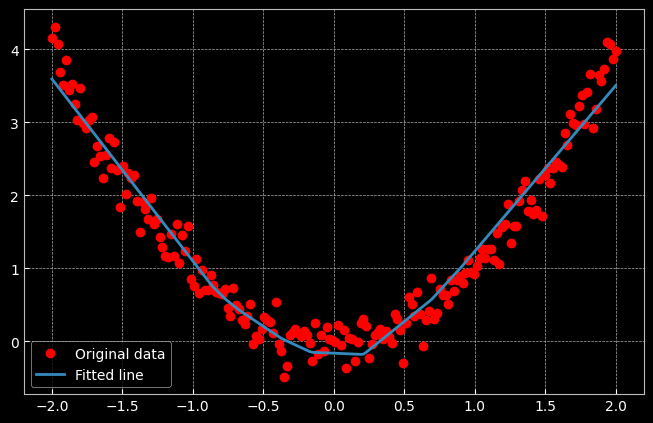

In [146]:
# Plot the graph
inputs = torch.from_numpy(x_train)

predicted = model.forward(inputs).detach().numpy()
for name, param in model.named_parameters():
    print(name, param)
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()